In [1]:
# Nativos
import os
import sys
            
#calculo
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
pylab.rcParams['figure.figsize'] = 8,6

#warning ignore future
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Utilitarios propios
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *

In [2]:
%%time
train = pd.read_csv('data_work/train_clean.csv') 
test = pd.read_csv('data_work/test_clean.csv')

display(train.head())
display(test.head())

,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,MatchedHit_TYPE[0],...,Mextra_DY2[3],FOI_hits_N,PT,P,label,count_null,MatchedHit_TYPE[0]_ratio,MatchedHit_TYPE[1]_ratio,MatchedHit_TYPE[2]_ratio,MatchedHit_TYPE[3]_ratio
0,47,31,13,15,2.00,1.58,1.15,1.13,8,2,...,4145.18,6,1764.93,12646.82,1,0,0.94,0.94,0.95,0.95
1,92,19,11,26,2.75,2.79,1.36,1.23,8,2,...,793.57,4,4511.28,28556.63,1,0,0.94,0.94,0.95,0.82
2,100,21,11,12,2.93,2.43,1.18,1.08,8,2,...,1899.84,9,1062.55,17491.70,1,0,0.94,0.94,0.95,0.95
3,74,27,13,20,3.07,2.52,1.92,1.30,8,2,...,438.86,5,4991.07,37192.87,1,0,0.94,0.94,0.95,0.95
4,18,22,8,8,1.83,1.95,1.12,1.75,8,2,...,2402.92,6,1347.70,16688.75,1,0,0.94,0.94,0.95,0.95


,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,Mextra_DY2[2],Mextra_DY2[3],FOI_hits_N,PT,P,count_null,MatchedHit_TYPE[0]_ratio,MatchedHit_TYPE[1]_ratio,MatchedHit_TYPE[2]_ratio,MatchedHit_TYPE[3]_ratio
0,0,55,12,10,15,2.13,1.17,1.50,1.60,8,...,7618.11,14871.40,6,1174.48,6884.50,0,0.94,0.94,0.95,0.95
1,1,43,18,12,15,2.70,1.11,1.33,1.60,8,...,140.25,265.48,7,4344.64,48769.53,0,0.94,0.94,0.95,0.95
2,2,90,34,19,29,1.80,2.06,1.21,1.34,8,...,862.30,1669.43,4,4109.81,20296.05,0,0.94,0.94,0.95,0.95
3,3,141,43,15,16,4.61,2.74,1.47,1.12,8,...,471.16,900.29,9,940.24,26062.05,0,0.94,0.94,0.83,0.95
4,4,22,18,8,9,1.64,2.44,1.00,1.56,8,...,85.89,162.87,8,1386.38,59872.34,0,0.94,0.94,0.83,0.82


CPU times: user 54.6 s, sys: 3 s, total: 57.6 s
Wall time: 1min 45s


In [3]:
train = reduce_size_data(train, description=False)

Tamaño de uso actual : PROFUNDO 1474.9336395263672 MB REAL 1474.9336395263672 MB
Tamaño de uso final : PROFUNDO 586.8574447631836 MB REAL 586.8574447631836 MB


In [4]:
test = reduce_size_data(test, description=False)

Tamaño de uso actual : PROFUNDO 393.3163070678711 MB REAL 393.3163070678711 MB
Tamaño de uso final : PROFUNDO 158.57299327850342 MB REAL 158.57299327850342 MB


In [5]:
train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

In [6]:
test.columns

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

# Nshared

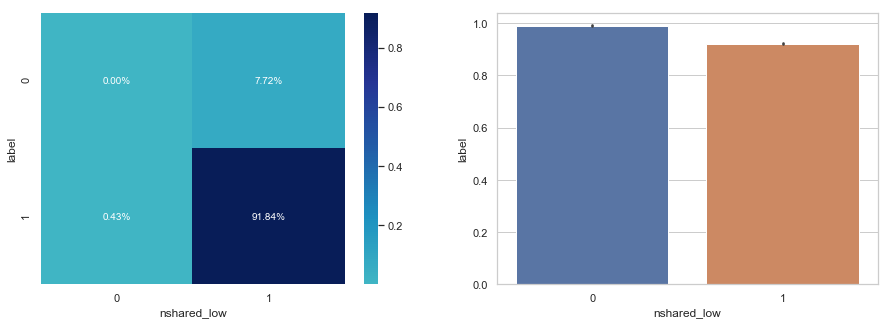

In [7]:
def rule_nshared(val):
    if val <= 1:
        return 1
    else:
        return 0

train['nshared_low'] = train['NShared'].apply(rule_nshared)
test['nshared_low'] = test['NShared'].apply(rule_nshared)
flash_analysis(train, 'nshared_low', 'label')

# P

In [8]:
train['P'] = train['P'] / 1000
test['P'] = test['P'] / 1000
train['PT'] = train['PT'] / 1000
test['PT'] = test['PT'] / 1000

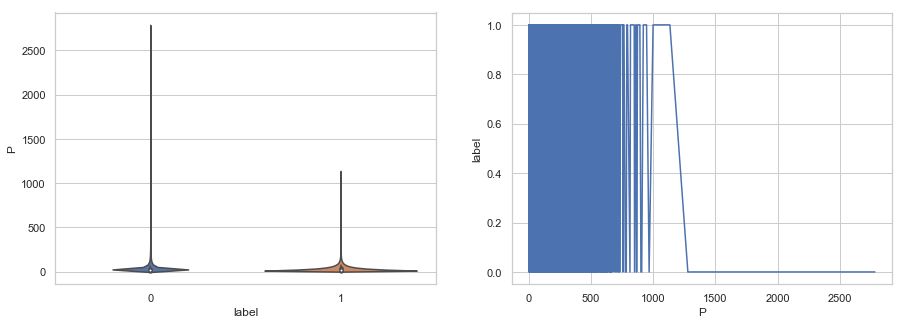

In [9]:
flash_numeric(train, 'P', 'label')

# PT

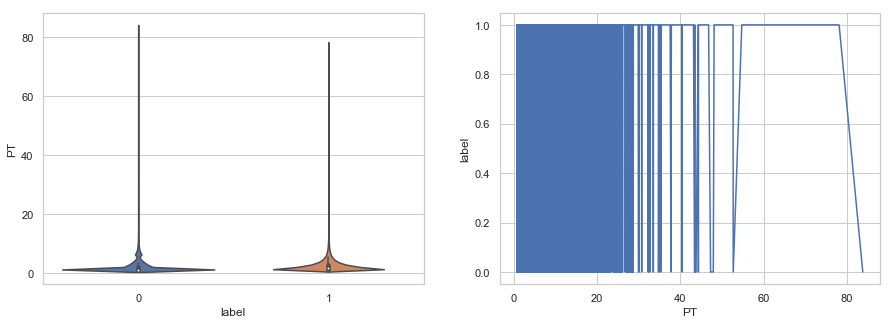

In [10]:
flash_numeric(train, 'PT', 'label')

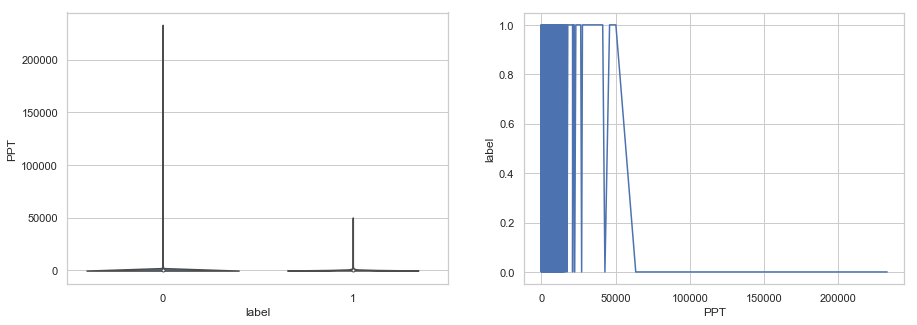

In [11]:
train['PPT'] = train['P'] * train['PT']
flash_numeric(train, 'PPT', 'label')

In [12]:
test['PPT'] = test['P'] * test['PT']

# TYPE

In [13]:
cols_type = [col for col in train.columns if col.startswith('MatchedHit_TYPE')][:4]
cols_type

['MatchedHit_TYPE[0]',
 'MatchedHit_TYPE[1]',
 'MatchedHit_TYPE[2]',
 'MatchedHit_TYPE[3]']

In [14]:
for col in cols_type:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [15]:
train = pd.get_dummies(train, columns=cols_type)
test = pd.get_dummies(test, columns=cols_type)                           

In [16]:
train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_X[0]', 'MatchedHit_X[1]',
       'MatchedHit_X[2]', 'MatchedHit_X[3]', 'MatchedHit_Y[0]',
       'MatchedHit_Y[1]', 'MatchedHit_Y[2]', 'MatchedHit_Y[3]',
       'MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]',
       'MatchedHit_Z[3]', 'MatchedHit_DX[0]', 'MatchedHit_DX[1]',
       'MatchedHit_DX[2]', 'MatchedHit_DX[3]', 'MatchedHit_DY[0]',
       'MatchedHit_DY[1]', 'MatchedHit_DY[2]', 'MatchedHit_DY[3]',
       'MatchedHit_DZ[0]', 'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]',
       'MatchedHit_DZ[3]', 'MatchedHit_T[0]', 'MatchedHit_T[1]',
       'MatchedHit_T[2]', 'MatchedHit_T[3]', 'MatchedHit_DT[0]',
       'MatchedHit_DT[1]', 'MatchedHit_DT[2]', 'MatchedHit_DT[3]',
       'Lextra_X[0]', 'Lextra_X[1]', 'Lextra_X[2]', 'Lextra_X[3]',
       'Lextra_Y[0]', 'Lextra_Y[1]', 'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared',
       'Mextra_DX2[0]', 'Mextra_DX2[1]', 'Mextr

In [17]:
key = 'ncl'
list_ncl = [col for col in train.columns if  col.startswith(key)]
list_ncl

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]']

In [18]:
train['ncl_max'] = train[list_ncl].apply(lambda _ :max(list(_)), axis=1)

In [19]:
train['ncl_mean'] = train[list_ncl].apply(lambda _ : _.mean(), axis=1)

In [22]:
train['ncl_min'] = train[list_ncl].apply(lambda _ : _.min(), axis=1)

In [20]:
list_ncl = [col for col in train.columns if  col.startswith(key)]
list_ncl

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'ncl_max', 'ncl_min', 'ncl_mean']

In [21]:
train[list_ncl].head()

,ncl[0],ncl[1],ncl[2],ncl[3],ncl_max,ncl_min,ncl_mean
0,47,31,13,15,47,47,26.50
1,92,19,11,26,92,92,37.00
2,100,21,11,12,100,100,36.00
3,74,27,13,20,74,74,33.50
4,18,22,8,8,22,22,14.00
